<a href="https://colab.research.google.com/github/Rishita32/Kaggle-Machine-Learning-Practice/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data=pd.read_csv('drive/MyDrive/Machine Learning Practice/datasets/insurance.csv')

In [ ]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-8-497d56811d69>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

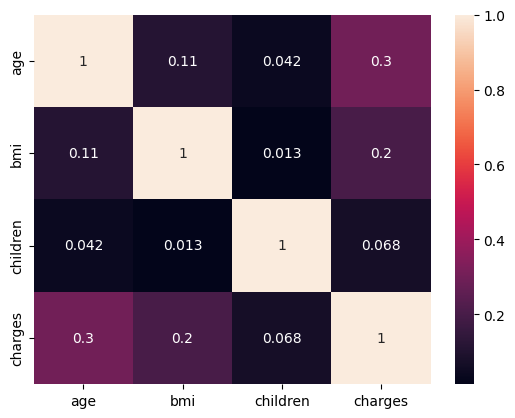

In [ ]:
corr=data.corr()
sns.heatmap(corr, annot=True)

#there is no correlation among any variables

In [ ]:
data.shape

(1338, 7)

Text(0.5, 1.0, 'Violin plot for smoker vs charges')

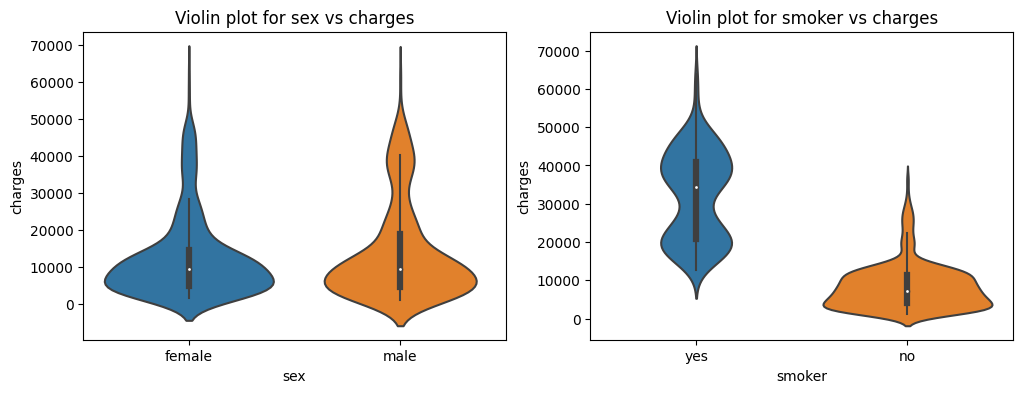

In [ ]:
f=plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.violinplot(x='sex', y='charges', data=data, ax=ax)
ax.set_title('Violin plot for sex vs charges')

ax=f.add_subplot(122)
sns.violinplot(x='smoker', y='charges', data=data, ax=ax)
ax.set_title('Violin plot for smoker vs charges')

# charges are similiar for female and male
# charges are higher for smoker=yes

<Axes: xlabel='children', ylabel='charges'>

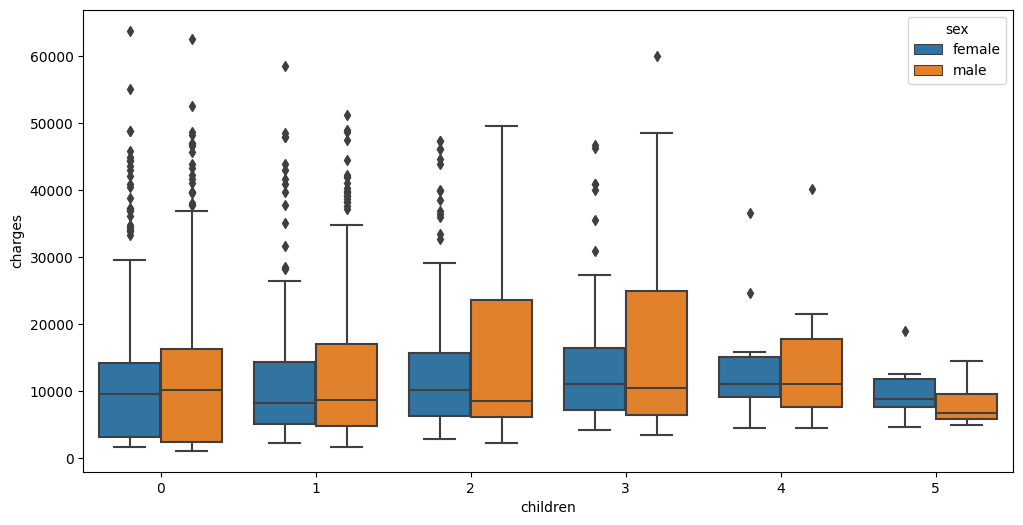

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='children', y='charges', hue='sex', data=data)

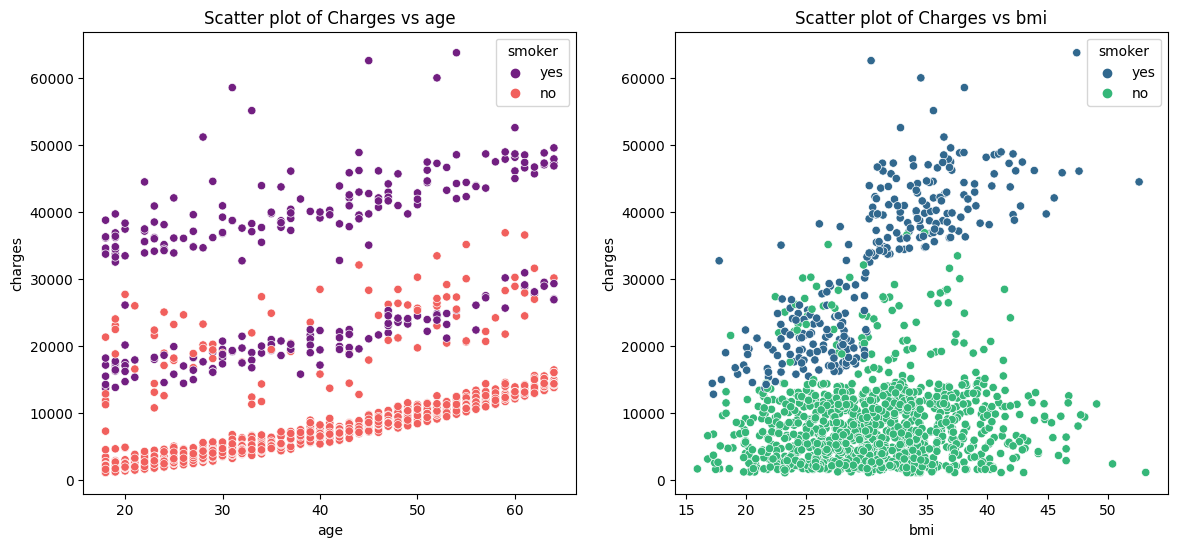

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=data,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=data,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

In [ ]:
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [ ]:
df_encode['charges'] = np.log(df_encode['charges'])

In [ ]:
X=df_encode.drop(['charges'], axis=1)
y=df_encode['charges']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=20)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
r_sq = model.score(X, y)
print(r_sq)

0.7702516983344999


In [ ]:
print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

intercept: 7.015980077165953
slope: [ 0.0346256   0.01321895 -0.07572455  0.14678476  0.2813226   0.24553534
  0.51732682  0.43068932  1.55548635 -0.06571613 -0.15950104 -0.12938416]


In [ ]:
class LeafEntry:
    def __init__(self, data, sum, matchesTargetSum):
        self.data = data
        self.sum = sum
        self.matchesTargetSum = matchesTargetSum

class Node:
    def __init__(self):
        self.data = 0
        self.left = None
        self.right = None
def newNode(data):
    temp = Node()
    temp.data = data
    temp.left = None
    temp.right = None
    return temp
def printLeafNodes(node, currentSum, targetSum, leafLlist):
    # check for null node
    if node is None:
        return

    # update currentSum
    currentSum += node.data

    # if node has a left child, recursively check the child
    if node.left is not None:
        printLeafNodes(node.left, currentSum, targetSum, leafLlist)

    # if node has a right child, recursively check the child
    if node.right is not None:
        printLeafNodes(node.right, currentSum, targetSum, leafLlist)
    # test if a leaf node is reached
    if node.left is None and node.right is None:
        #check if the current Sum matches the targetSum
        isMatch = (currentSum == targetSum)

        # add leaf entry into the LeafList
        entry = LeafEntry(node.data, currentSum, isMatch)
        leafLlist.append(entry)

        print(str(node.data) + ' -- Branch Tolal:' + str(currentSum) + ' targetSum match:')

        return

# test: create a binary tree
#root = None
root = newNode(1)
root.left = newNode(7)
root.right = newNode(9)
root.left.left = newNode(2)
root.left.right = newNode(6)
root.left.right.left = newNode(5)
root.left.right.right = newNode(11)
root.right.right = newNode(9)
root.right.right.left = newNode(5)
print("printing leaf nodes...")
currentSum = 0
targetSum = 24
leafLlist = []
# recursively search for leaf nodes
printLeafNodes(root, currentSum, targetSum, leafLlist)
print("--------------------------------------------------------")
print('Target Sum:' + str(targetSum))
# check if any leaf entry has a matched targetSum
result = any(entry for entry in leafLlist if entry.matchesTargetSum == True)


printing leaf nodes...
2 -- Branch Tolal:10 targetSum match:
5 -- Branch Tolal:19 targetSum match:
11 -- Branch Tolal:25 targetSum match:
5 -- Branch Tolal:24 targetSum match:
--------------------------------------------------------
Target Sum:24
